# Lab 6: AirBnB data

This week, we look at some airbnb listings. We look at covariance between columns, missing data, and distributions of variables.

In [2]:
library(dplyr)
library(ggplot2)
listing = read.csv("listing.csv")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
listing %>% glimpse()

Observations: 23,624
Variables: 29
$ accommodates                <int> 2, 2, 6, 1, 2, 2, 2, 2, 3, 1, 2, 4, 3, 4,…
$ amenities                   <fct> "{}", "{\"Wireless Internet\",\"Air condi…
$ availability_30             <int> 29, 18, 3, 0, 6, 22, 10, 0, 3, 20, 17, 27…
$ bathrooms                   <dbl> 1.0, 1.0, 1.0, 1.0, 1.0, NA, 1.5, 1.0, 2.…
$ bed_type                    <fct> Real Bed, Real Bed, Real Bed, Real Bed, R…
$ bedrooms                    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ beds                        <int> 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,…
$ cancellation_policy         <fct> flexible, flexible, flexible, flexible, m…
$ city                        <fct> palmdale, acton, acton, los angeles, los …
$ has_availability            <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ host_id                     <int> 44800067, 84615808, 71743973, 41646908, 8…
$ id                          <int> 8909380, 14078522, 13006928, 7898757, 160…
$ instant_bookabl

In [4]:
head(listing)

accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
2,{},29,1,Real Bed,1,1,flexible,palmdale,NA,...,10,10,10,9,93,9,Private room,CA,,93550
2,"{""Wireless Internet"",""Air conditioning"",""Wheelchair accessible"",Kitchen,""Free parking on premises"",""Pets allowed"",""Pets live on this property"",Heating,Washer,Dryer,Essentials,Shampoo,Hangers}",18,1,Real Bed,1,1,flexible,acton,NA,...,10,10,10,10,100,10,Private room,CA,,93510
6,"{TV,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Pets allowed"",Breakfast,""Pets live on this property"",Dog(s),""Hot tub"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",Essentials,Shampoo,""24-hour check-in"",Hangers}",3,1,Real Bed,1,3,flexible,acton,NA,...,10,10,10,10,100,10,Entire home/apt,CA,,93510
1,"{Internet,""Wireless Internet"",Kitchen,""Free parking on premises"",Washer,Dryer,""Smoke detector"",Essentials,Shampoo}",0,1,Real Bed,1,1,flexible,los angeles,NA,...,10,9,10,9,93,10,Private room,CA,,90007
2,"{Internet,""Wireless Internet"",""Free parking on premises"",""Fire extinguisher"",Essentials,""Lock on bedroom door"",""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",6,1,Real Bed,1,1,moderate,los angeles,NA,...,10,10,10,10,98,10,Private room,CA,,90007
2,"{TV,Internet,""Wireless Internet"",Kitchen,Washer,Dryer}",22,NA,Real Bed,1,1,strict,los angeles,NA,...,9,8,9,8,89,9,Private room,CA,$320.00,90007


### Goal: 
Airbnb is meant for home sharing, but there are hosts with more than 20 listings. This is more like commercial hotels without regulation than home sharing. We would like to identify such users and see what their impact is on the airbnb ecosystem.

### Step 1:
host_id is a unique identifier for host. id is a unique identifier for listing. Construct a table where for each host_id, we have the number of unique ids, and the mean review_scores_value for that host_id. Call this table tb1. Name the 3 resulting columns host_id, nid, and mean_review.

In [5]:
tb1 = listing %>% group_by(host_id) %>% 
summarise(nid = length(unique(id)), mean_review = mean(review_scores_value))

head(tb1)

host_id,nid,mean_review
59,1,10.0
521,1,8.0
767,1,8.0
1158,1,10.0
3041,2,8.5
3144,1,10.0


### Step 2:

Create a sequence of box plots, where the x axis is `nid`, and y axis is `mean_review`. Also plot the best line using `geom_smooth`
 
What do you see?

Warning message:
“Removed 295 rows containing non-finite values (stat_boxplot).”`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 295 rows containing non-finite values (stat_smooth).”

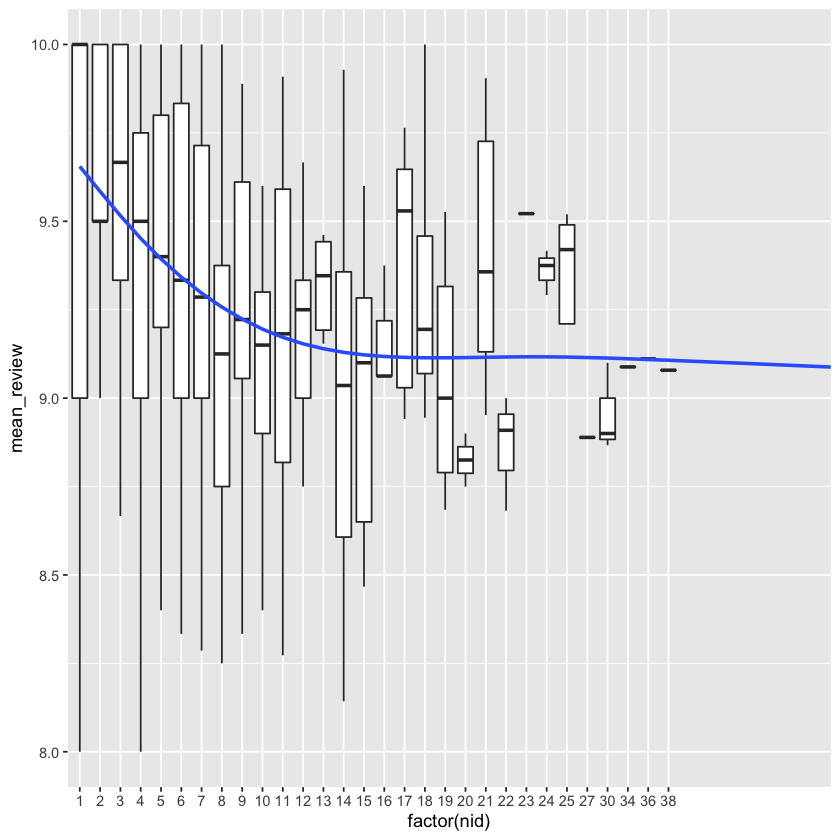

In [6]:
ggplot(data = tb1) + 
geom_boxplot(mapping = aes(x = factor(nid), y = mean_review), outlier.shape = NA) +
geom_smooth(mapping = aes(x = nid, y = mean_review), se = F)+
ylim(8,10) 

<hr>

### Quick review of `cut_interval` function

In [7]:
# Random Number Generation
n = 10
runif(n)

[1] 0.7533688 0.7319319 0.6844763 0.6379124 0.8596062 0.6627444 0.5349848
 [8] 0.1640334 0.7239202 0.4118979

Objective: What is percentage of numbers fall between $[0, 0.3]$ ?

In [8]:
n = 100000
mydata = tibble(RN = runif(n))
mydata = mydata %>% mutate(is03 = cut_interval(RN, 
                                               n = 2,
                                               breaks =  c(0, 0.3,1),
                                               labels = c('[0, 0.3]','(0.3, 1]')))
head(mydata)
mydata %>% group_by(is03) %>% summarise(prop = n()/nrow(mydata))

RN,is03
0.06848524,"[0, 0.3]"
0.58781461,"(0.3, 1]"
0.66890352,"(0.3, 1]"
0.79244064,"(0.3, 1]"
0.12811512,"[0, 0.3]"
0.75912792,"(0.3, 1]"


is03,prop
"[0, 0.3]",0.30052
"(0.3, 1]",0.69948


<hr>

### Step 3:
Create a variable called `isCommercial` and if $nid\leq 5$ it's `no` if  $nid\geq 10$ it's `yes` otherwise it's `maybe`

In [9]:
tb2 <- tb1 %>% mutate(isCommercial = cut_interval(nid, n = 3,
                                                  breaks = c(0, 5.1, 9.9, Inf),
                                                  labels = c("no", "maybe", "yes")))
head(tb2 %>% filter(isCommercial == "no"))

head(tb2 %>% filter(isCommercial == "maybe"))

head(tb2 %>% filter(isCommercial == "yes"))

host_id,nid,mean_review,isCommercial
59,1,10.0,no
521,1,8.0,no
767,1,8.0,no
1158,1,10.0,no
3041,2,8.5,no
3144,1,10.0,no


host_id,nid,mean_review,isCommercial
26069,6,8.666667,maybe
95543,7,9.285714,maybe
107275,8,9.000000,maybe
195697,7,9.000000,maybe
219283,8,8.875000,maybe
239712,8,8.750000,maybe


host_id,nid,mean_review,isCommercial
26860,25,9.480000,yes
57161,22,8.909091,yes
70344,10,9.600000,yes
91136,11,9.181818,yes
465624,15,8.533333,yes
761042,12,9.250000,yes


### Step 4:
Plot the distribution of nid for each level of `isCommercial`

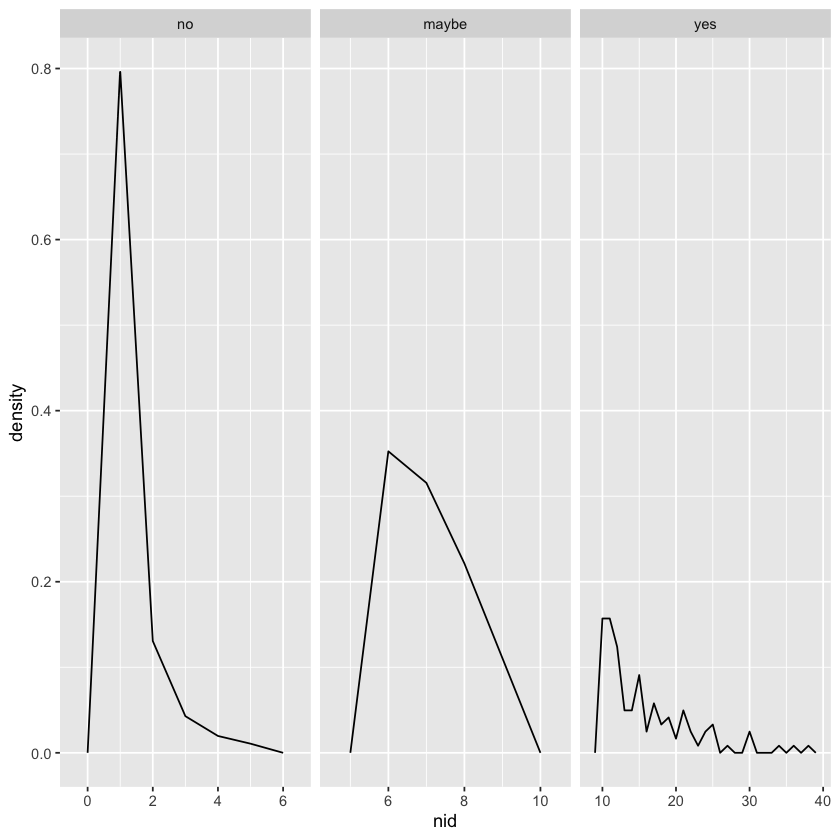

In [13]:
tb2 %>% ggplot() + 
geom_freqpoly(mapping = aes(x = nid, y = ..density..), binwidth = 1) + 
facet_grid(~isCommercial, scale = 'free_x')

### Step 5:
Plot the best linear line for `nid` vs `mean_review` for each `isCommercial`

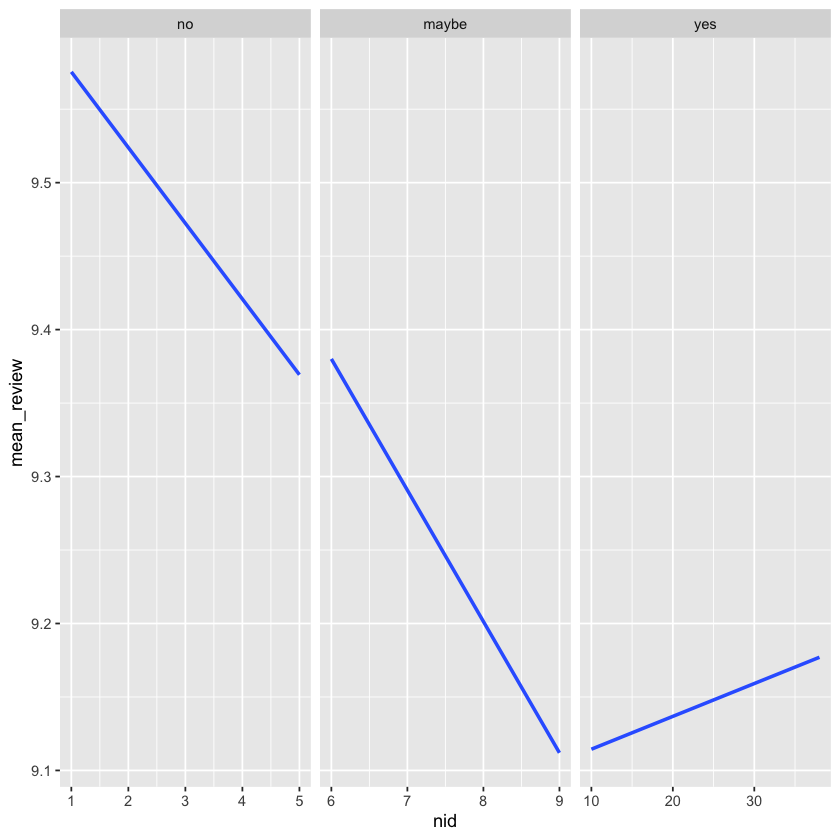

In [14]:
tb2 %>%
ggplot(mapping = aes(x = nid, y = mean_review)) + 
geom_smooth(method = 'lm', se = F) + 
facet_grid(~isCommercial, scale = 'free_x')